In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.enginnering import engin

In [2]:
train, test = Load_dataset()
drop_col = ['id', 'year', 'month', 'day', 'Country', 'City', 'lat', 'lon']
train_1 = train.drop(columns=drop_col)
corr = train_1.corr()

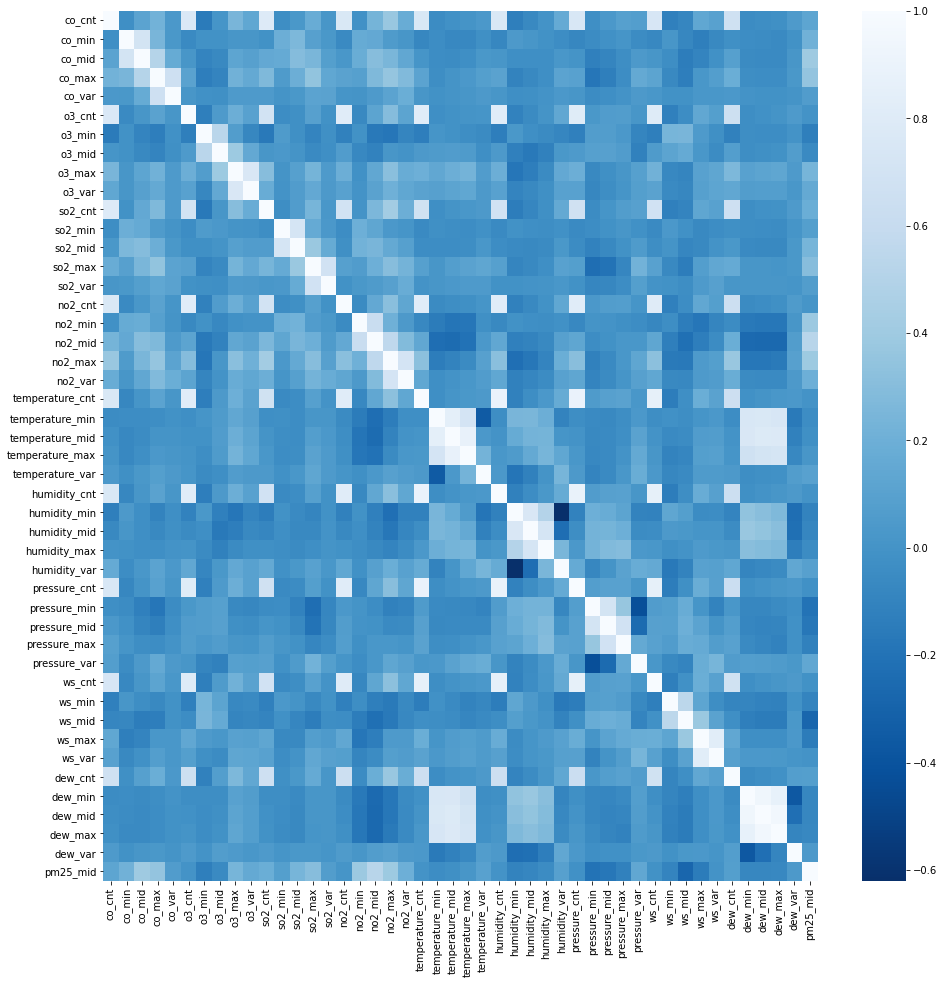

In [3]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap='Blues_r')
plt.savefig('Analyze/heatmap.png')

In [31]:
Australia = train[(train['Country']=='Australia')]
print(len(Australia["City"].unique()))
print(len(Australia))
Brisbane = Australia[(Australia['City']=='Brisbane')]
print(len(Brisbane))

6
5656
1009


In [37]:
train.columns

Index(['id', 'year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt',
       'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid',
       'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max',
       'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var',
       'temperature_cnt', 'temperature_min', 'temperature_mid',
       'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min',
       'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt',
       'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var',
       'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min',
       'dew_mid', 'dew_max', 'dew_var', 'pm25_mid'],
      dtype='object')

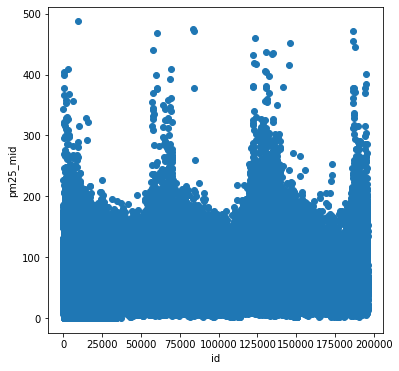

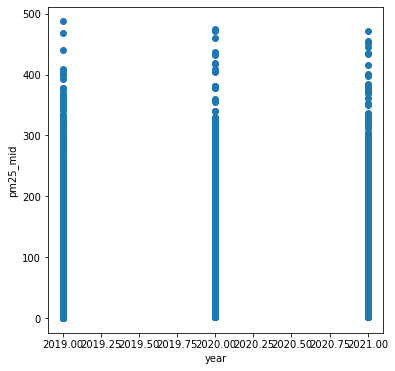

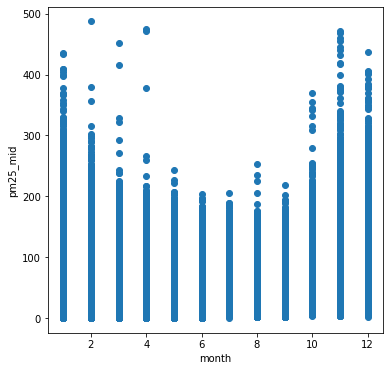

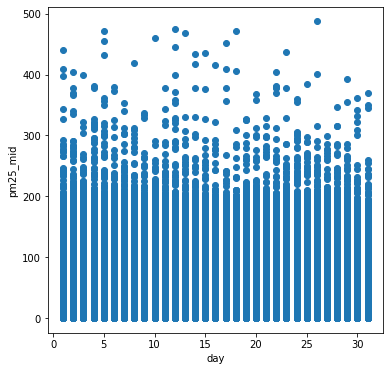

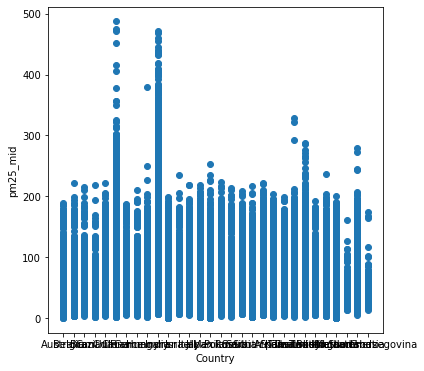

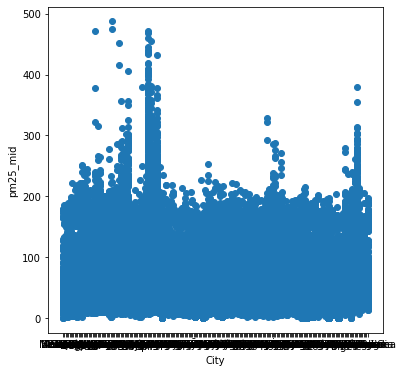

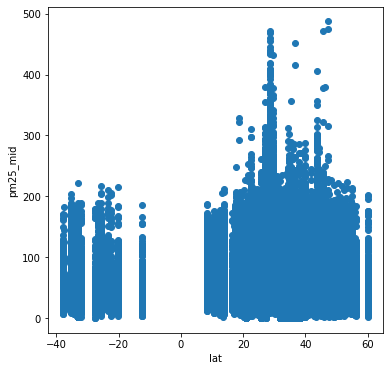

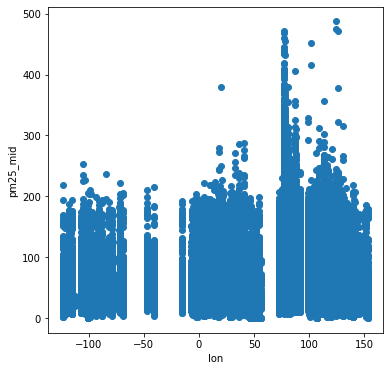

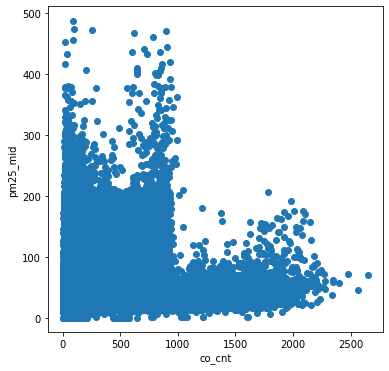

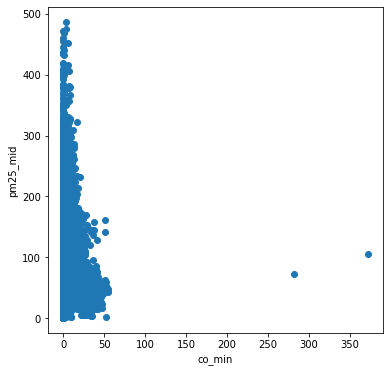

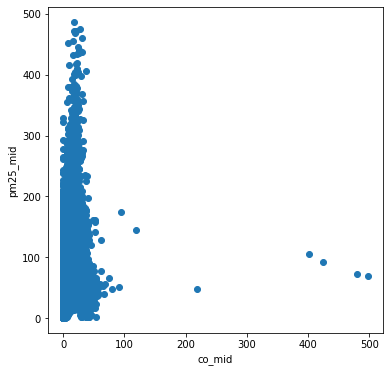

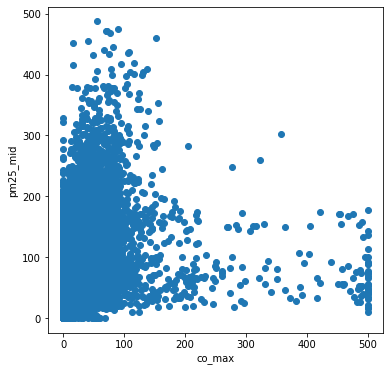

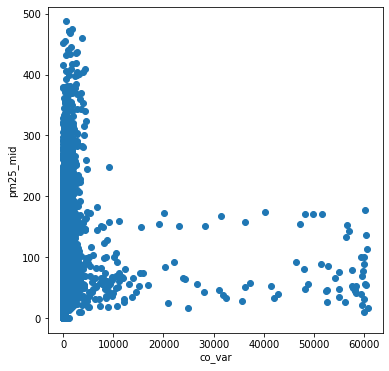

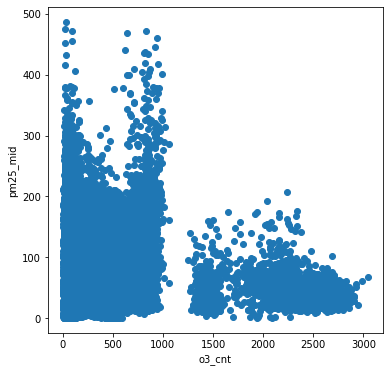

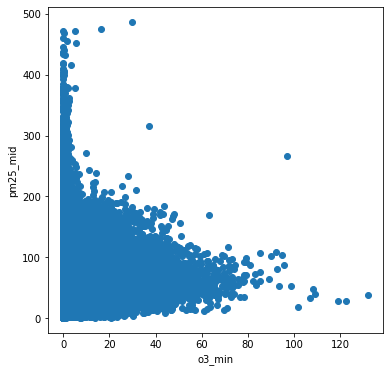

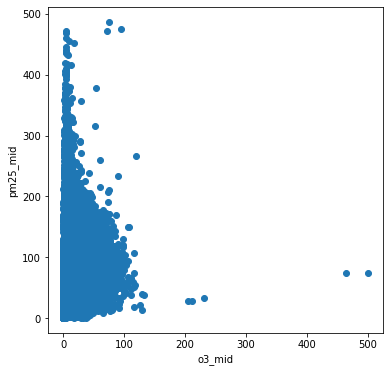

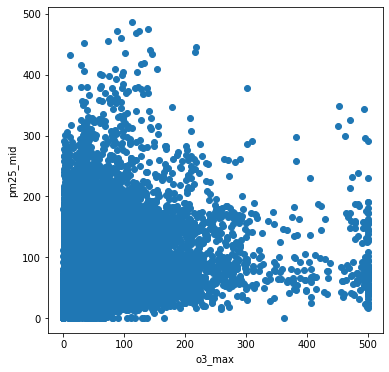

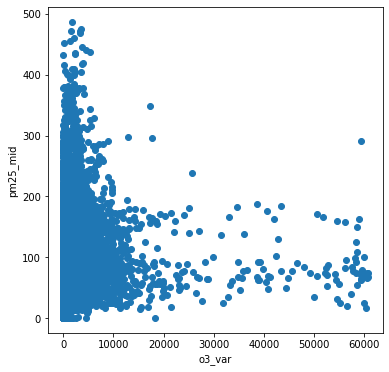

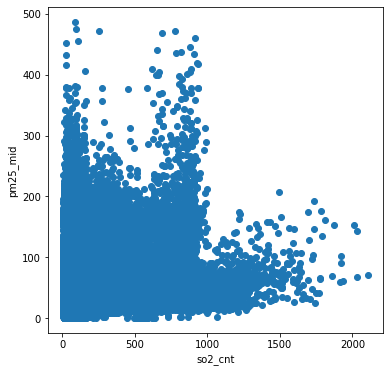

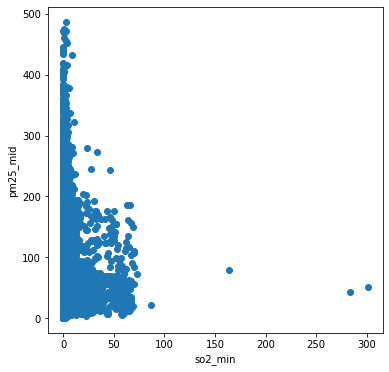

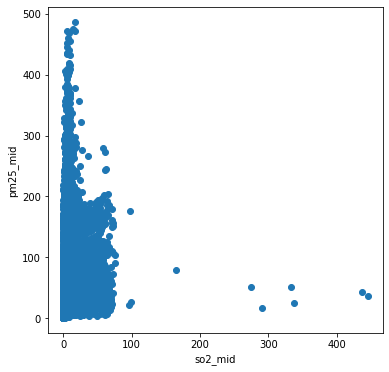

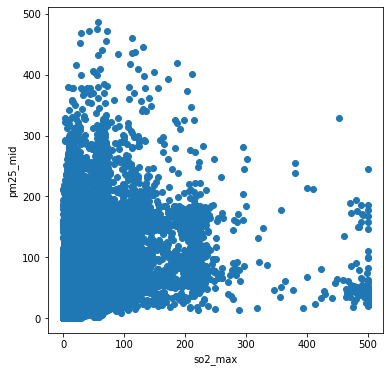

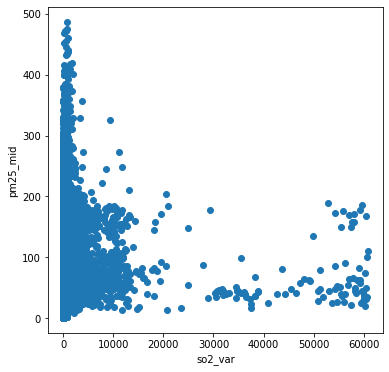

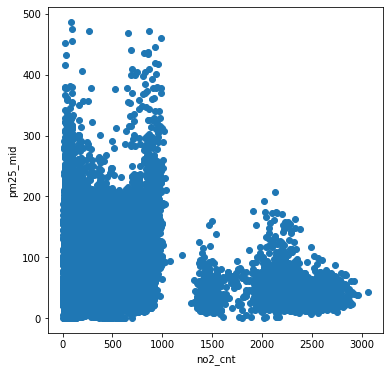

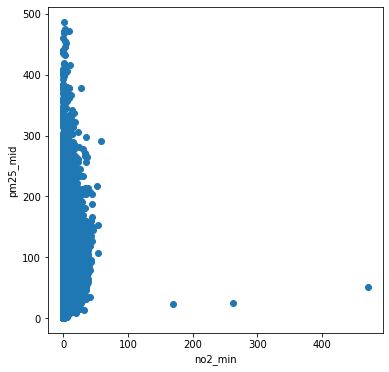

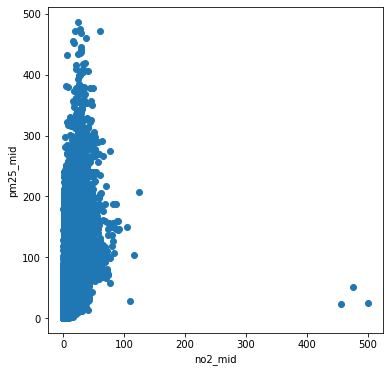

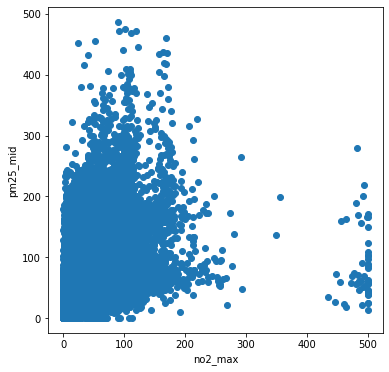

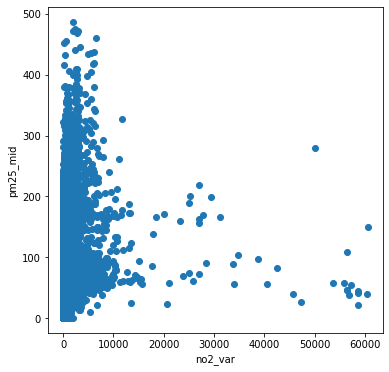

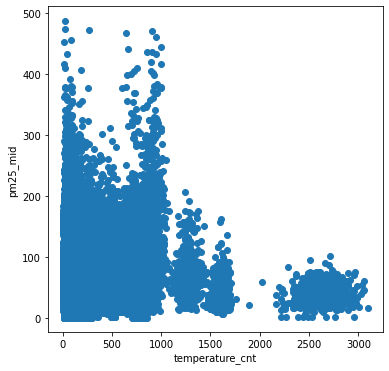

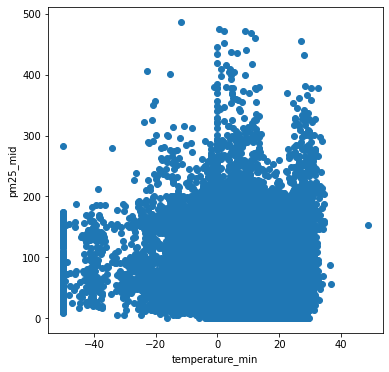

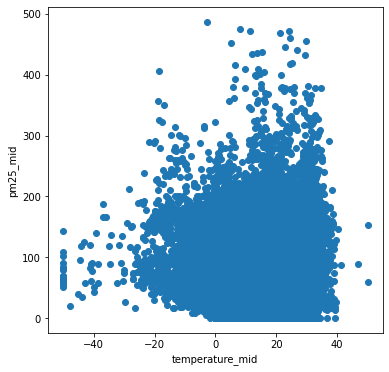

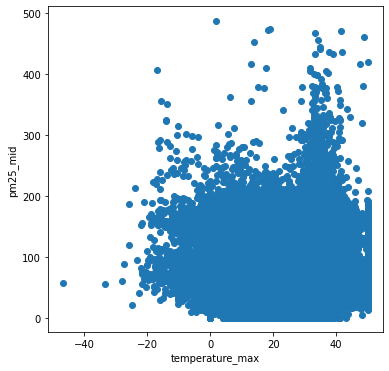

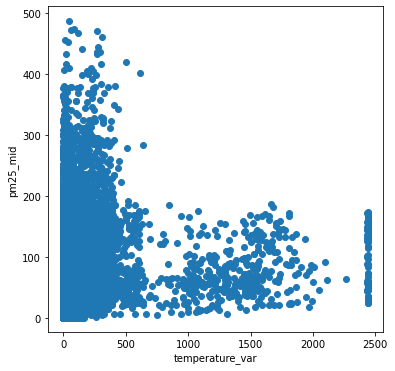

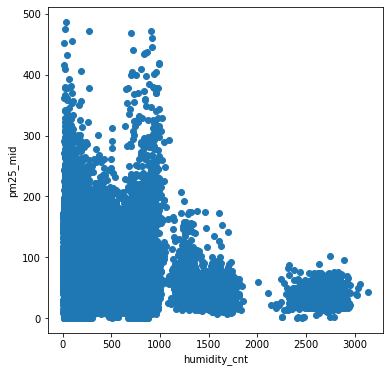

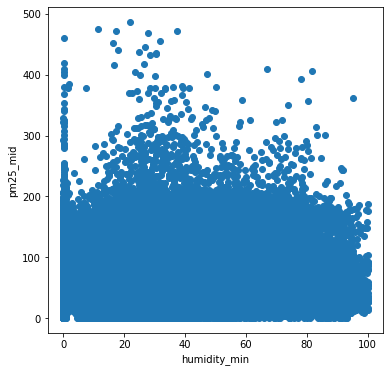

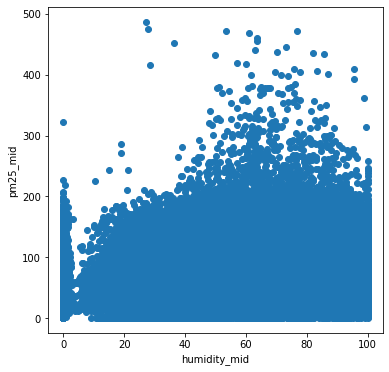

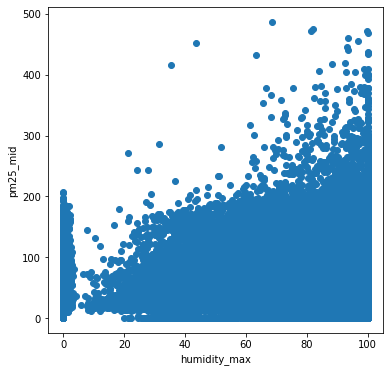

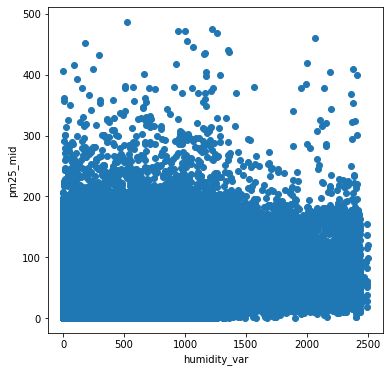

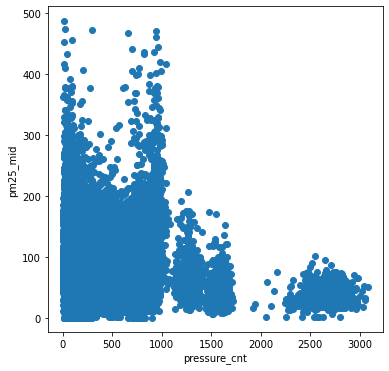

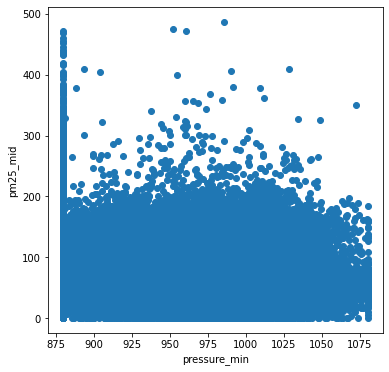

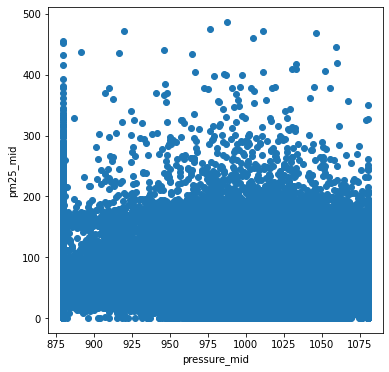

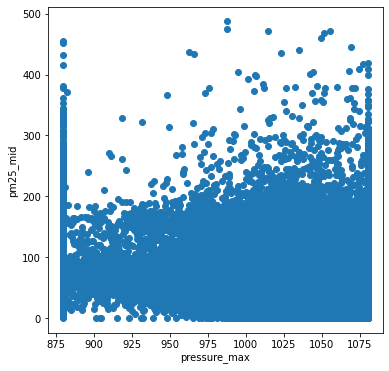

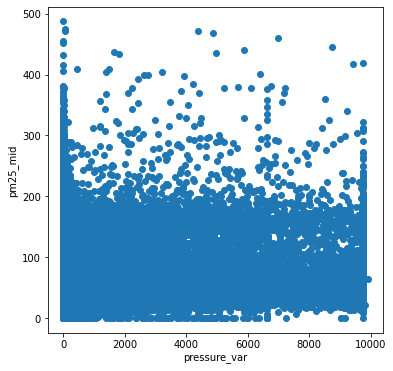

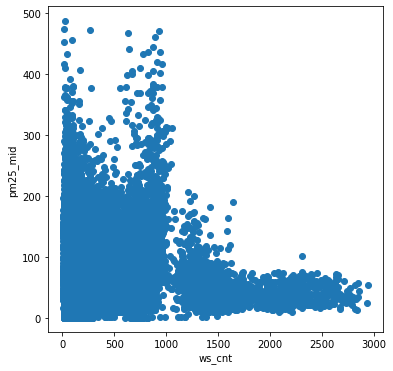

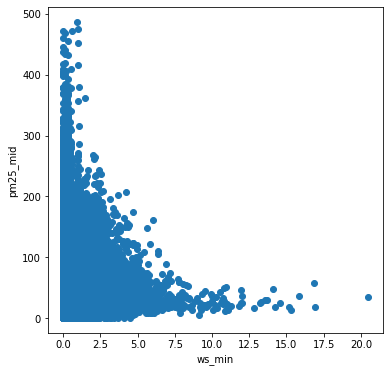

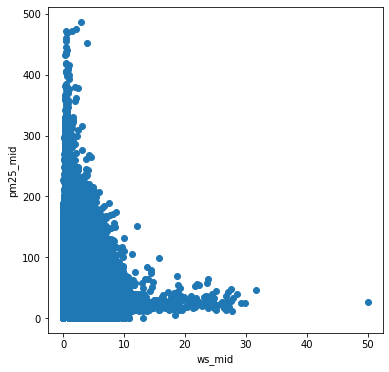

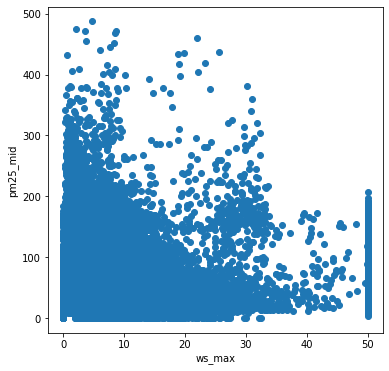

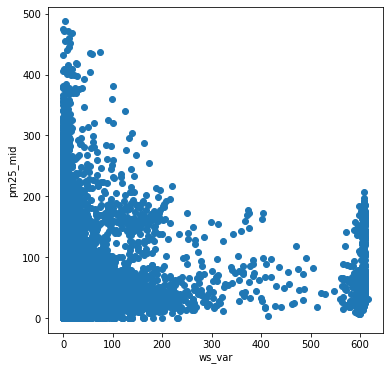

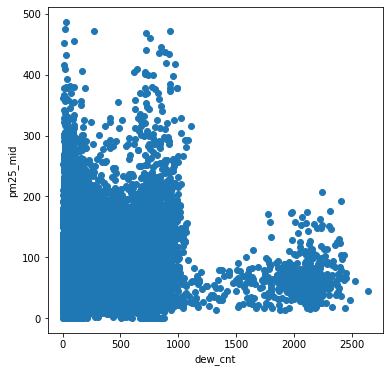

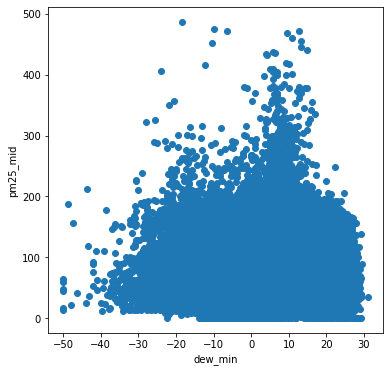

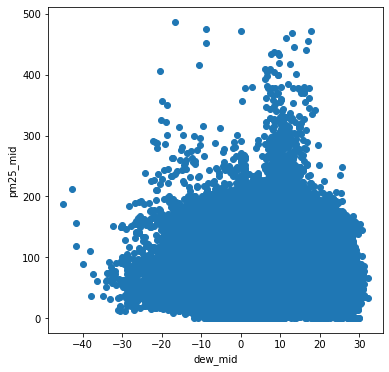

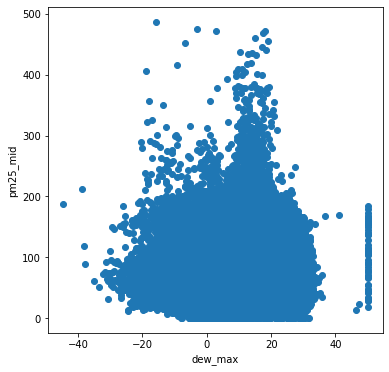

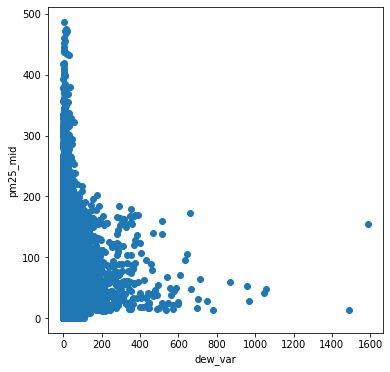

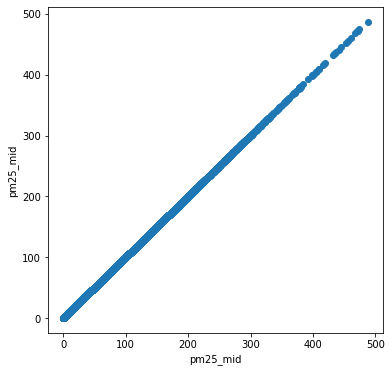

In [17]:
i=1
for col in train.columns:    
    plt.figure(figsize=(6,6))
    plt.scatter(train[col],train["pm25_mid"])
    plt.ylabel("pm25_mid")
    plt.xlabel(col)
    plt.show()

In [21]:
train, test = Load_dataset()
train.year.unique()
df_2019 = train[(train["year"]==2019)]
df_2020 = train[(train["year"]==2020)]
df_2021 = train[(train["year"]==2021)]

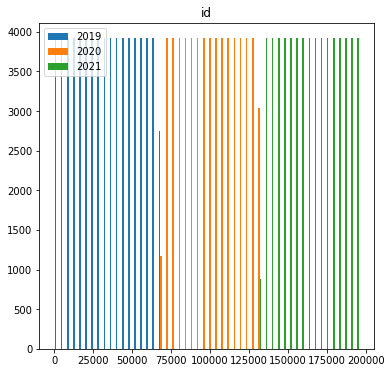

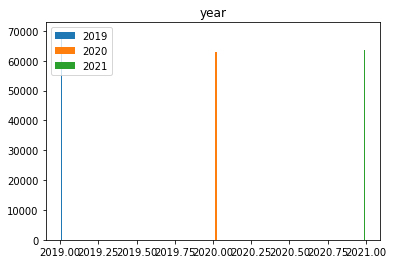

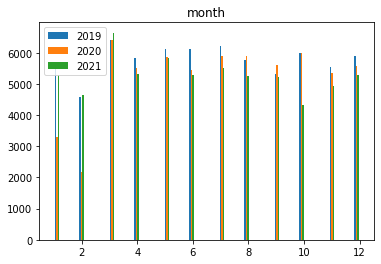

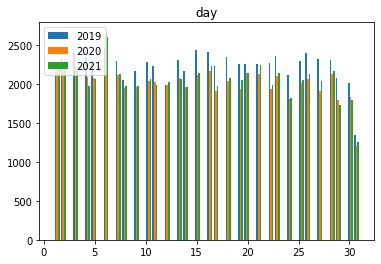

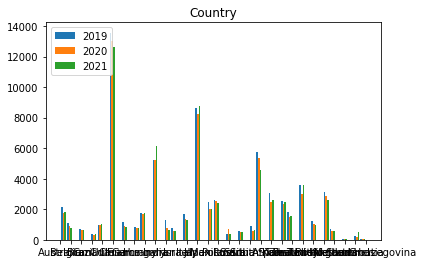

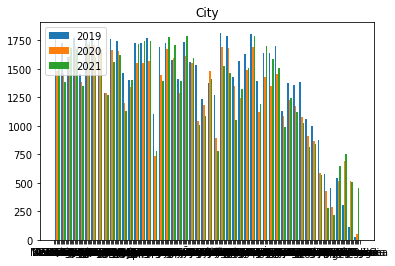

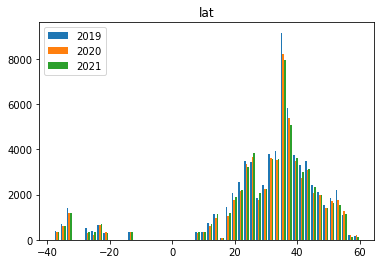

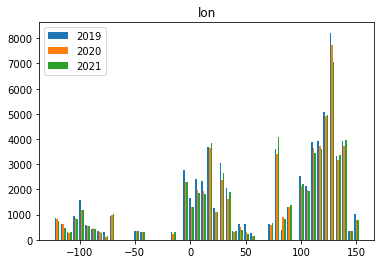

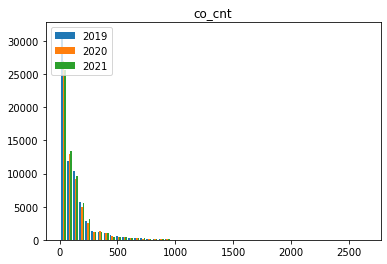

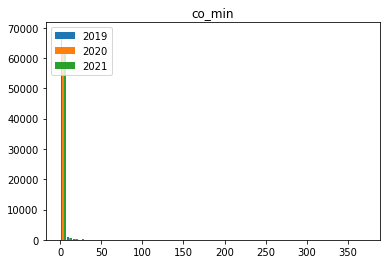

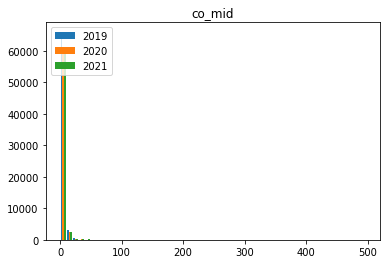

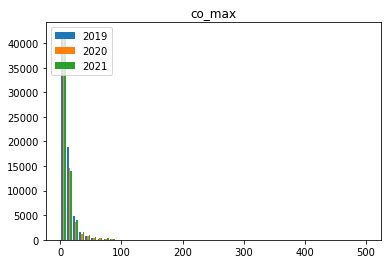

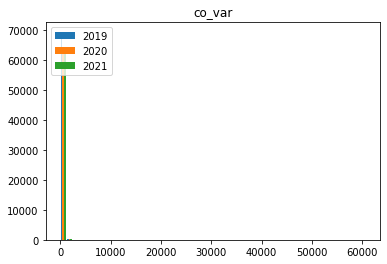

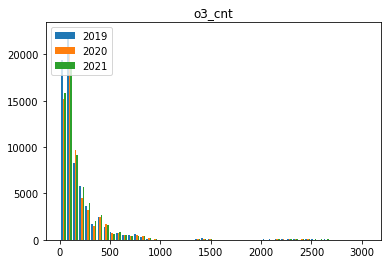

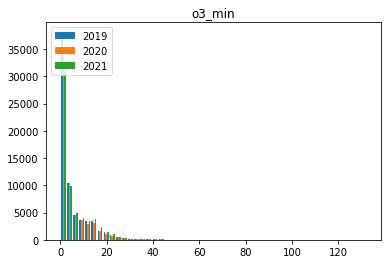

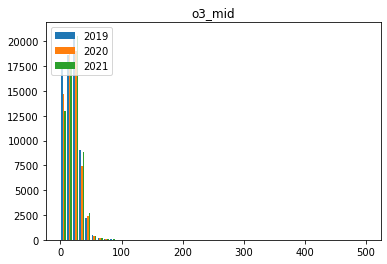

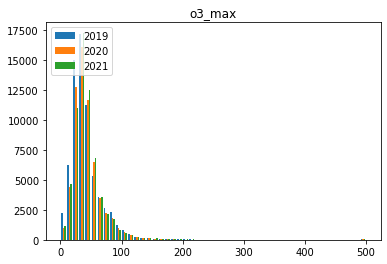

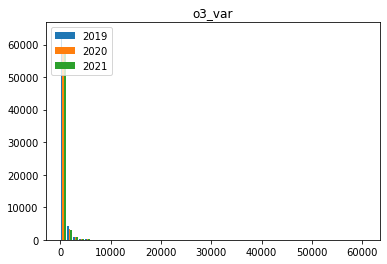

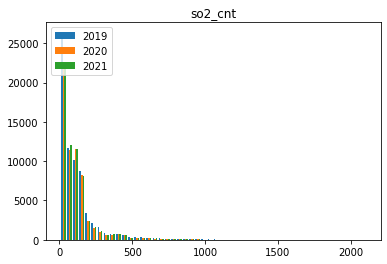

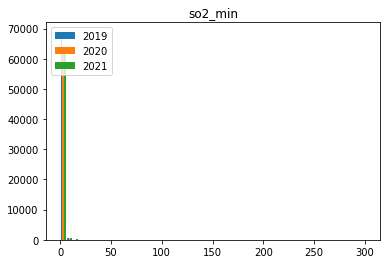

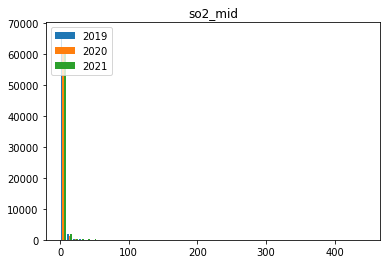

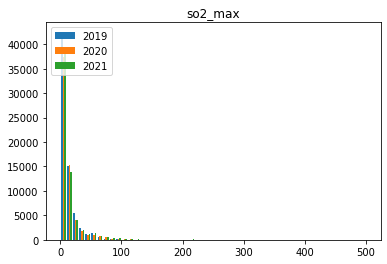

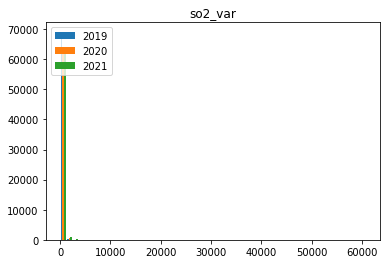

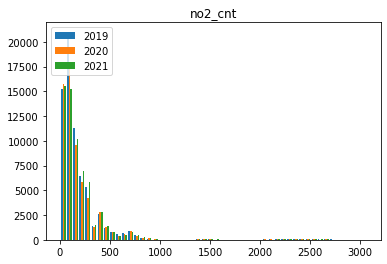

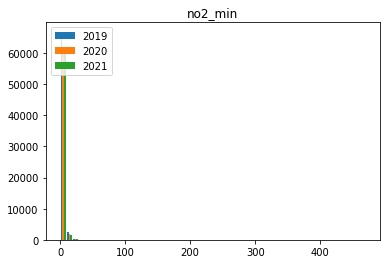

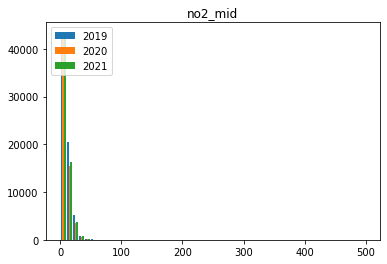

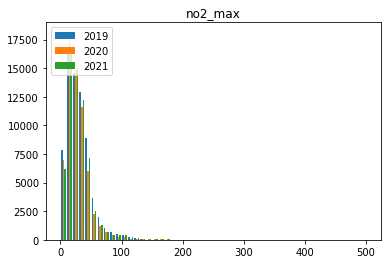

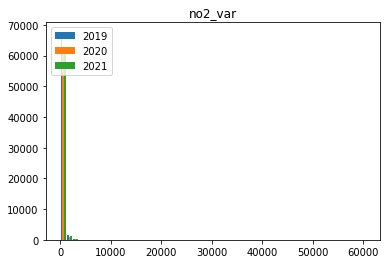

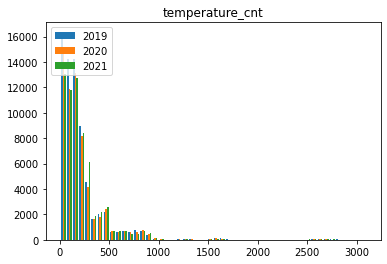

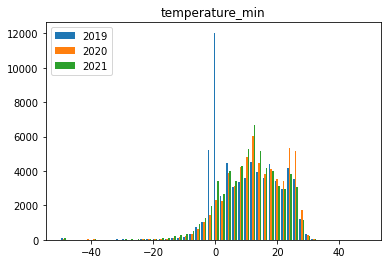

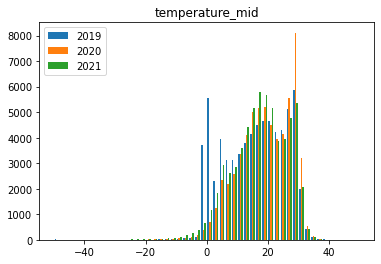

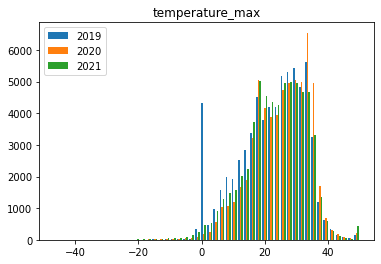

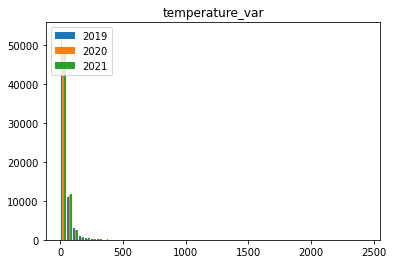

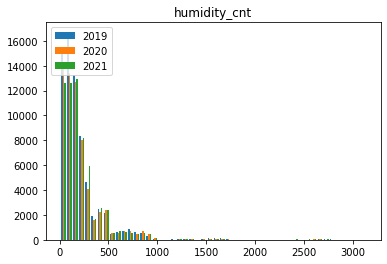

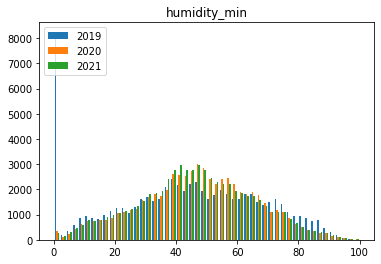

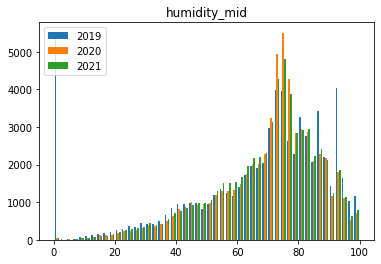

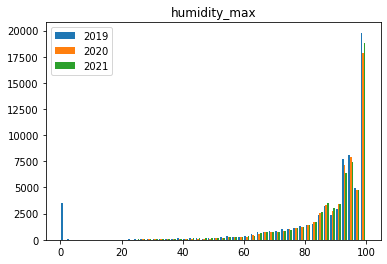

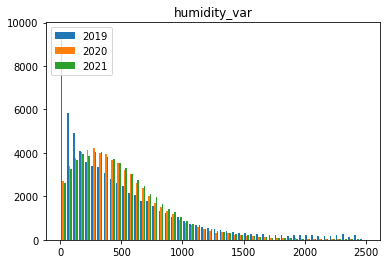

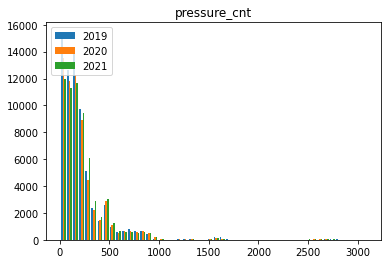

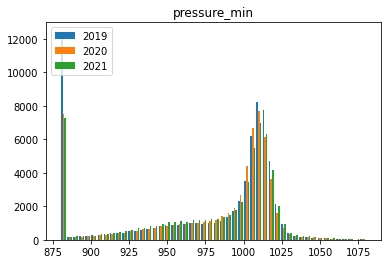

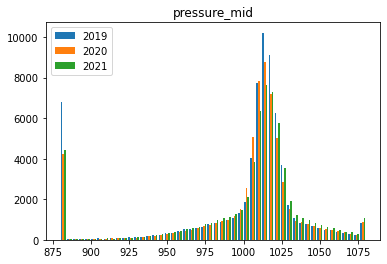

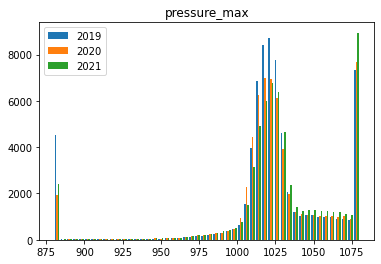

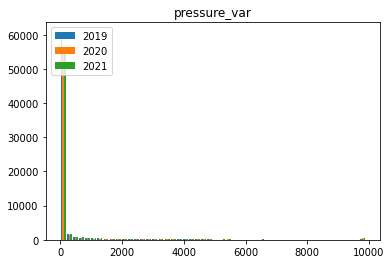

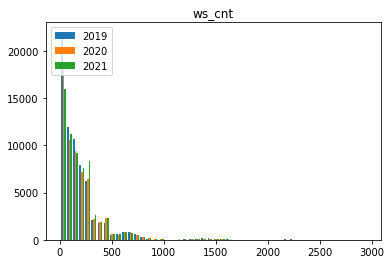

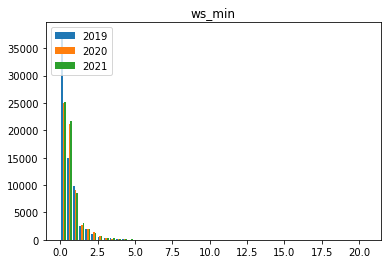

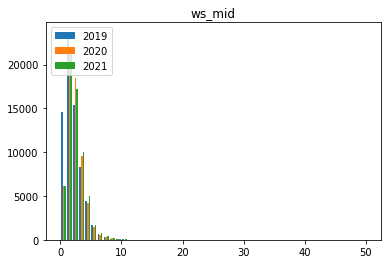

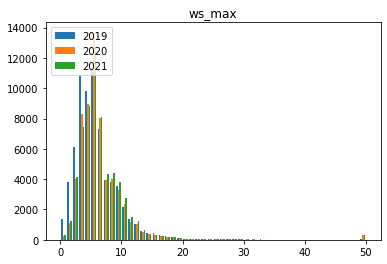

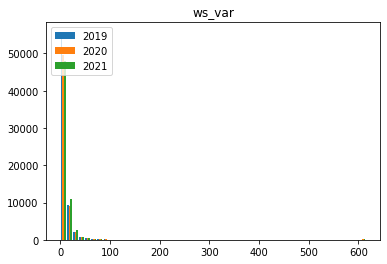

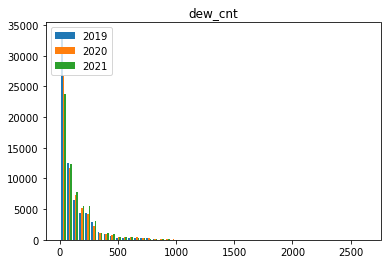

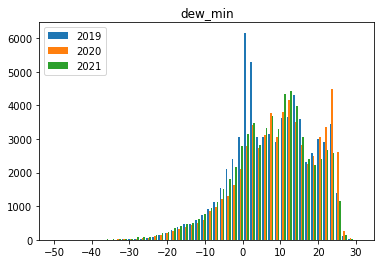

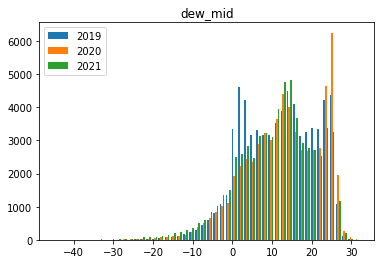

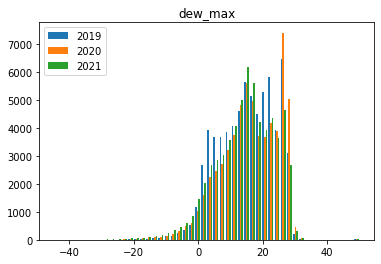

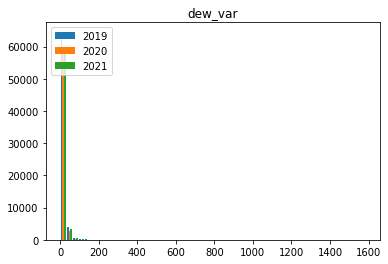

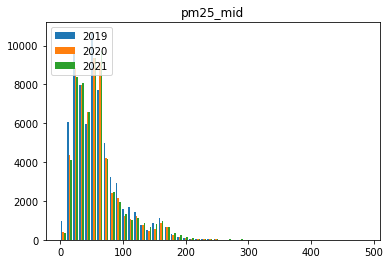

In [31]:
plt.figure(figsize=(6,6))
for col in train.columns:
#     bins = np.linspace(-10, 10, 100)
    plt.hist([df_2019[col], df_2020[col], df_2021[col]], bins=50, label=['2019', '2020','2021'])
    plt.legend(loc='upper left')
    plt.title(col)
    plt.show()

In [6]:
train, test = Load_dataset()
train.year.unique()

array([2019, 2020, 2021], dtype=int64)

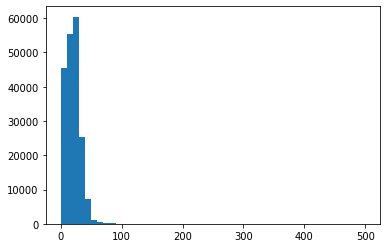

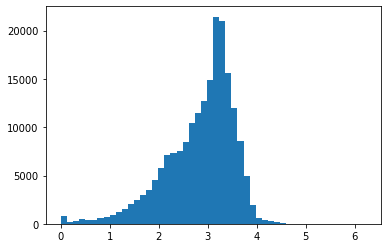

In [33]:
# o3_mid

o3_mid_log = np.log(train["o3_mid"] + 1)
plt.hist(train["o3_mid"], bins=50)
plt.show()
plt.hist(o3_mid_log, bins=50)
plt.show()

## pm2.5

In [39]:
train["Country"].unique()

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'France', 'Germany', 'Hungary', 'India', 'Iran', 'Israel', 'Italy',
       'Japan', 'Mexico', 'Poland', 'Russia', 'Serbia', 'South Africa',
       'South Korea', 'Spain', 'Taiwan', 'Thailand', 'Turkey',
       'United Kingdom', 'United States', 'Vietnam', 'Netherlands',
       'Bosnia and Herzegovina', 'Croatia'], dtype=object)

In [ ]:
asia, europe, africa, north_america, south_america, oseania

In [59]:
def Country(country):
    oseania = ["Australia"]
    asia = ["China", 'India', 'Iran', 'Israel', 'Japan','South Korea', 'Taiwan', 'Thailand', "Vietnam", 'Russia']
    europe = ['Belgium','France', 'Germany','Hungary','Italy','Poland','Serbia','Spain','Turkey',
              'United Kingdom','Netherlands','Bosnia and Herzegovina','Croatia']
    south_america = ['Brazil','Chile']
    north_america = ['Canada','Mexico','United States']
    africa = ['South Africa']
    
    if country in oseania:
        return "oseania"
    elif country in asia:
        return "asia"
    elif country in europe:
        return "europe"
    elif country in south_america:
        return "south_america"
    elif country in north_america:
        return "north_america"
    else:
        return "africa"

In [63]:
train["Continet"] = train["Country"].apply(Country)
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,Continet
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,oseania
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,oseania
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,oseania
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,oseania
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,oseania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150,north_america
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895,north_america
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299,north_america
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523,asia


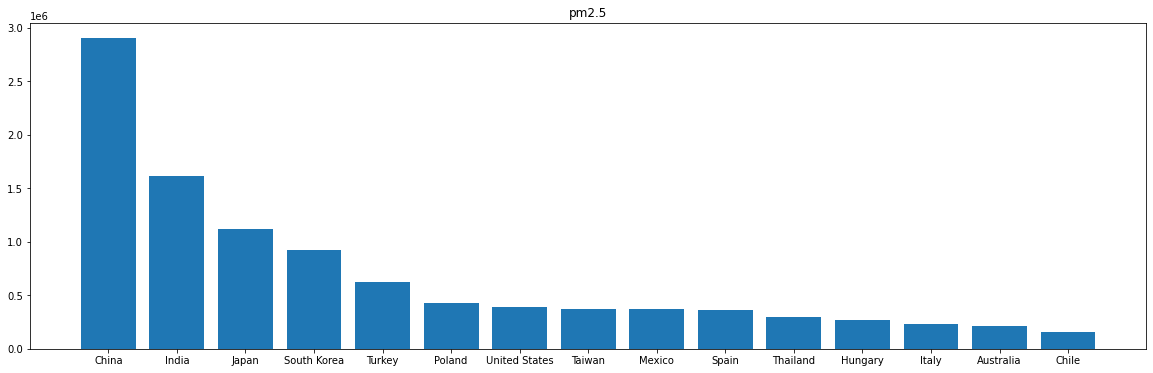

In [34]:
plt.figure(figsize=(20,6))
plt.bar(pm["country"][:15], pm["pm25"][:15])
plt.title("pm2.5")
plt.show()

In [35]:
train, test = Load_dataset()
print(china.City.unique())
china = train[(train["Country"]=="China")]

['Beijing' 'Changsha' 'Chengdu' 'Foshan' 'Fushun' 'Fuzhou' 'Guangzhou'
 'Guiyang' 'Haikou' 'Hangzhou' 'Harbin' 'Hefei' 'Hegang' 'Jieyang' 'Jinan'
 'Kunming' 'Lhasa' 'Nanchang' 'Nanjing' 'Nanning' 'Ningbo' 'Qingdao'
 'Qinhuangdao' 'Qiqihar' 'Shantou' 'Shenzhen' 'Suzhou' 'Taiyuan' 'Xiamen'
 'Xining' 'Xinxiang' 'Xi’an' 'Yinchuan' 'Yunfu' 'Zhengzhou' 'Zhuzhou'
 'Ürümqi' 'Changzhou' 'Shanghai']


2900723.9889999973


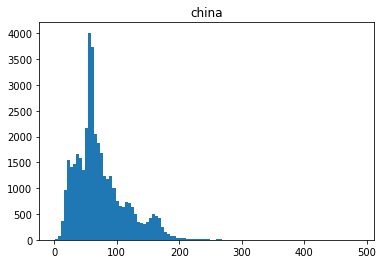

In [36]:
print(sum(china["pm25_mid"]))
plt.hist(china["pm25_mid"], bins=100)
plt.title("china")
plt.show()